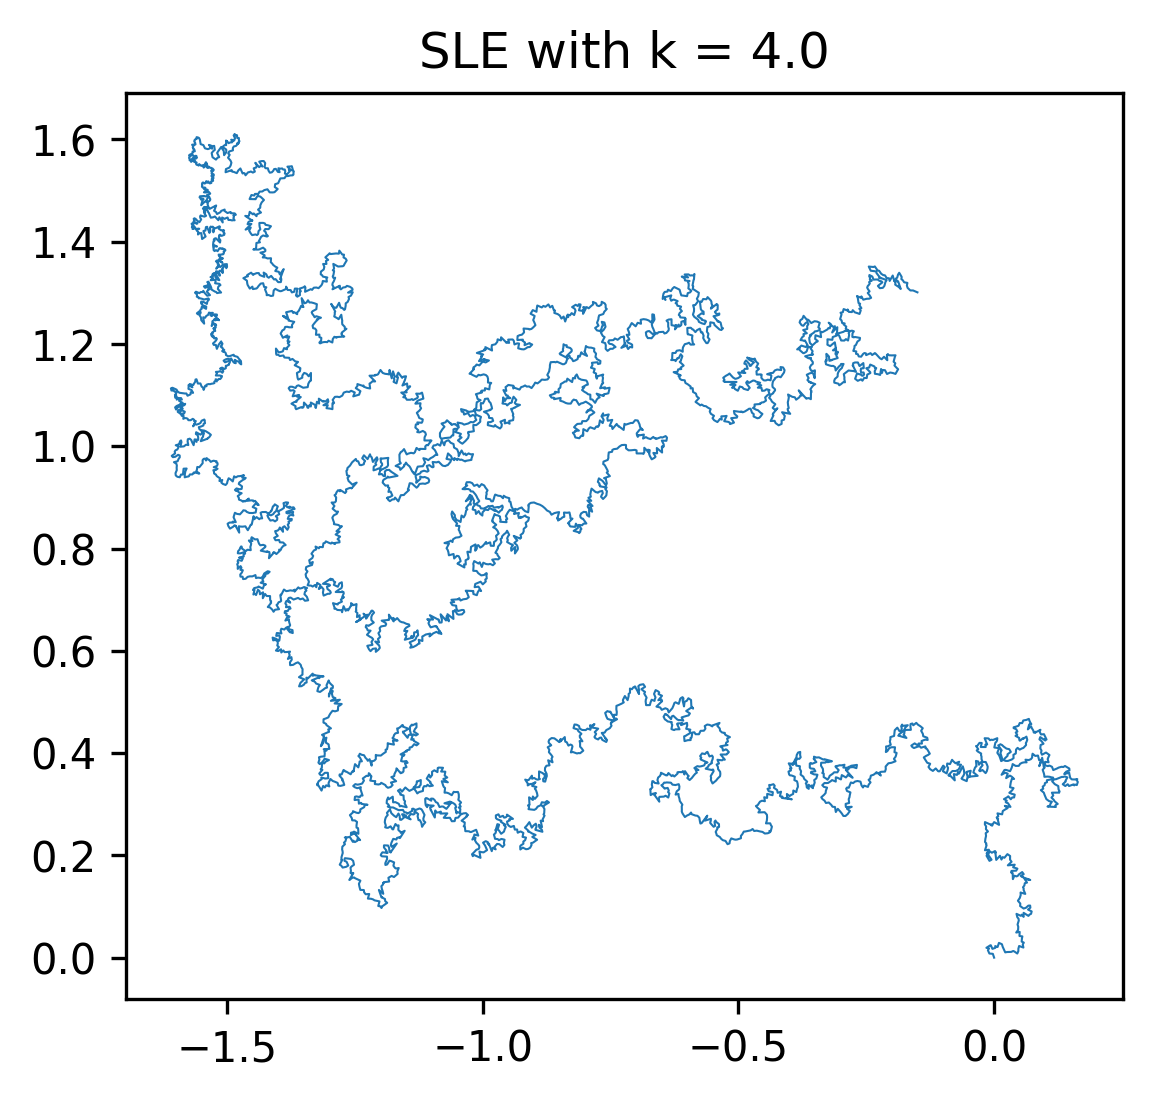

Number of steps = 8168


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import math

# Numerical simulation of chordal SLE_k over the interval [0,T]
k = 4.0
T = 1.0

# Tolerence used by the variable step size control
tol = 0.0125

# Maximum and minimum step sizes allowed in the simulation
max_stepsize = T/2048.0
min_stepsize = T/(2.0**33.0)

sqrt_k = math.sqrt(k)

# Lists containing the discretized SLE trace and Brownian path.
sle_path = [0.0+0.0j]
brownian_path = []

# Computes the SLE trace associated with a constant driver.
# This is achieved by solving z' = - 2h/z at t = 0.5.
def horizontal_trace(z0, h):
    zt = cmath.sqrt(z0**2.0 - 2.0*h)
    
    if zt.imag < 0:
        zt = -zt
        
    return zt


# Computes the SLE trace associated with a vertical driver.
# This is achieved by solving z' = sqrt_k*increment at t = 1.
def vertical_trace(z0, increment):

    return z0 + sqrt_k*increment


# Computes the SLE trace using a step of the Ninomiya-Victoir scheme.
# This is equivalent to solving the backward Loewner equation driven
# by a piecewise linear path that has horizontal and vertical pieces.
def ninomiya_victoir(z0, h, brownian_increment):
    
    return horizontal_trace(vertical_trace(horizontal_trace(z0, h),
                                           brownian_increment), h)


# Propagates the numerical SLE with a variable step-size so that
#
# |SLE_{i+1} - SLE_{i}| < tol    for all neighbouring discretization points.
#
# This type of step size control was proposed for chordal SLE in the paper:
# Tom Kennedy, Numerical Computations for the Schramm-Loewner Evolution,
# Journal of Statistical Physics, 137:839, 2009.
def sle_step(time_increment, brownian_increment):
    l = len(brownian_path)
    
    # Approximate the next SLE point using the Ninomiya-Victoir scheme.
    # SLE traces are obtained by solving Loewner's differential equation
    # backwards in time starting from zero (hence the use of reversed()).
    zt = ninomiya_victoir(0.0+0.0j, time_increment, brownian_increment)
    
    for m in reversed(range(l)):
        zt = ninomiya_victoir(zt, brownian_path[m][0], brownian_path[m][1])
        
    # Check the propsed SLE point is sufficiently close to the previous point
    if ((abs(zt - sle_path[l-1]) < tol) or (time_increment <= min_stepsize))  \
    and (time_increment <= max_stepsize):
        
        # Update the numerical SLE trace and Brownian path        
        brownian_path.append([time_increment, brownian_increment])    
        sle_path.append(zt)

    else:
        # Generate the midpoint of the Brownian path over
        # the time interval using the Brownian bridge.        
        bridge_midpoint = 0.5*np.random.normal(0.0, math.sqrt(time_increment))

        half_time_increment = 0.5*time_increment
        half_increment = 0.5*brownian_increment
        
        # Approximate the SLE trace over the two subintervals
        zt = sle_step(half_time_increment, half_increment + bridge_midpoint)
        zt = sle_step(half_time_increment, half_increment - bridge_midpoint)
        
    return zt


# Compute the numerical SLE trace over the interval [0,T] using sle_step
zt = sle_step(T, np.random.normal(0.0, math.sqrt(T)));

# Plot the numerical SLE trace using matplotlib.pyplot
no_of_points = len(sle_path)

xvalues = []
yvalues = []

for i in range(no_of_points):
    xvalues.append(sle_path[i].real)
    yvalues.append(sle_path[i].imag)

plt.figure(0, dpi=300)
plt.plot(xvalues, yvalues, linewidth=0.5)
plt.title('SLE with k = ' + str(round(k, 2)))
plt.axis('scaled')
plt.show()

print('Number of steps = ' + str(no_of_points-1))

In [24]:
# Compute the numerical SLE trace over the interval [0,T] using sle_step
s_t=[0.0]
N=[0.0]
for j in range(0,6):
    T=T+j/10.0
    zt = sle_step(T, np.random.normal(0.0, math.sqrt(T)));

# Plot the numerical SLE trace using matplotlib.pyplot
    no_of_points = len(sle_path)
    N.append(no_of_points)

    xvalues = []
    yvalues = []

    for i in range(no_of_points):
        xvalues.append(sle_path[i].real)
        yvalues.append(sle_path[i].imag)
    
    s=v_esp_2(width_angle(xvalues,yvalues,0))
    s_t.append(s)
    


[1.1217760117368683, 1.1278155232066598, 1.1349047862779902, 1.1333752573228457, 1.1359080590533588]
[4249, 8422, 12564, 16660, 20756]


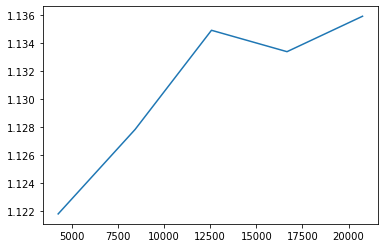

In [27]:
print(s_t[1:6])
print(N[1:6])
plt.plot(N[1:6],s_t[1:6])

In [118]:
#Method 2
import cmath
k=4.0
T=1.0
tol = 0.0005
N=1000 #Paso
D_t=T/N # Delta t
t_0=0
s1=cmath.sqrt(-4.0 + 2.0j)

def f_k2(z,t_k,B_t): 
    return math.sqrt(k)*B_t + cmath.sqrt(z**2.0 -4.0*t_k)

path_curve =[0.0 + 0.0j]
mu, sigma = 0, 0.1 # mean and standard deviation
s=np.random.normal(0.0, math.sqrt(1.0))


In [3]:
print(s1)

In [4]:
print(s)

In [7]:
#Brownian Motion
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"
        
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):
        """
        Generate motion by random walk
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def stock_price(
                    self,
                    s0=100,
                    mu=0.2,
                    sigma=0.68,
                    deltaT=52,
                    dt=0.1
                    ):
        """
        Models a stock price S(t) using the Weiner process W(t) as
        `S(t) = S(0).exp{(mu-(sigma^2/2).t)+sigma.W(t)}`
        
        Arguments:
            s0: Iniital stock price, default 100
            mu: 'Drift' of the stock (upwards or downwards), default 1
            sigma: 'Volatility' of the stock, default 1
            deltaT: The time period for which the future prices are computed, default 52 (as in 52 weeks)
            dt (optional): The granularity of the time-period, default 0.1
        
        Returns:
            s: A NumPy array with the simulated stock prices over the time-period deltaT
        """
        n_step = int(deltaT/dt)
        time_vector = np.linspace(0,deltaT,num=n_step)
        # Stock variation
        stock_var = (mu-(sigma**2/2))*time_vector
        # Forcefully set the initial value to zero for the stock price simulation
        self.x0=0
        # Weiner process (calls the `gen_normal` method)
        weiner_process = sigma*self.gen_normal(n_step)
        # Add two time series, take exponent, and multiply by the initial stock price
        s = s0*(np.exp(stock_var+weiner_process))
        
        return s

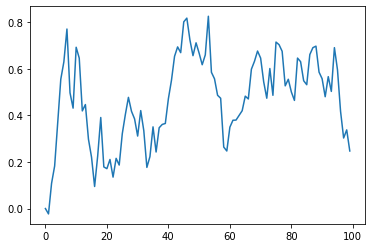

In [6]:
b = Brownian(0)
for i in range(1):
    plt.plot(b.gen_normal(100))
plt.show()

In [10]:
from random import seed
from random import random
# seed random number generator
seed(1)
# generate some random numbers
print(random(), random(), random())
def aum_br(k,D_t):
    r=random()
    if r<0.5:
        return math.sqrt(k*D_t)
    else:
        return -math.sqrt(k*D_t)

            
    

0.13436424411240122 0.8474337369372327 0.763774618976614


In [44]:
def curve_sle(T,N,b_w):
    D_t=T/N
    t=np.zeros(N)
    for j in range(1,N):
        t[j]=t[j-1]+D_t
    z_k=0.0 + 0.0j
    #z_k=f_k(0,t_k,b_w[1])#Z_1
    for i in range(1,N):
        cont=0
        t_k=t[i]
        z_k=f_k2(0,t_k,b_w[i])
        while cont<i-1:
            cont=cont+1
            t_k=t[i-cont]
            z_k=f_k2(z_k,t_k,b_w[i-cont])
            print(z_k)
            print(i,cont)
        path_curve.append(z_k)

            

In [45]:
k=3/8
proof1 = curve_sle(T,10,b_w)
#print(path_curve[0:10])

(-0.011858541225631422+1.0954451150103321j)
2 1
(0.009185715705022754+1.4141936756940379j)
3 1
(-0.0034731634800243896+1.5491706457198111j)
3 2
(0.029787742118313164+1.6732480259198426j)
4 1
(0.026270787377401357+1.8972511169936288j)
4 2
(0.013064179308302204+1.9998731931457445j)
4 3
(0.05023565818576508+1.897218387497598j)
5 1
(0.05536590664486768+2.19061792180913j)
5 2
(0.051259963103021625+2.366087293307258j)
5 3
(0.03766353005570031+2.449121052801747j)
5 4
(0.05309235883682942+2.0975567539427065j)
6 1
(0.06918515749195595+2.449284157318565j)
6 2
(0.07501827488165601+2.682945293745295j)
6 3
(0.07117019525091928+2.82800864644291j)
6 4
(0.0575969652449709+2.8978253527503854j)
6 5
(0.032418927023446446+2.280336619251412j)
7 1
(0.06312692468973759+2.6832150835251927j)
7 2
(0.08081962714943329+2.9662971659035327j)
7 3
(0.08767648324577851+3.1619828311752305j)
7 4
(0.08436837606673339+3.2859650457381187j)
7 5
(0.07099016602429312+3.346238510211961j)
7 6
(0.01185854122563142-2.449489742783

10


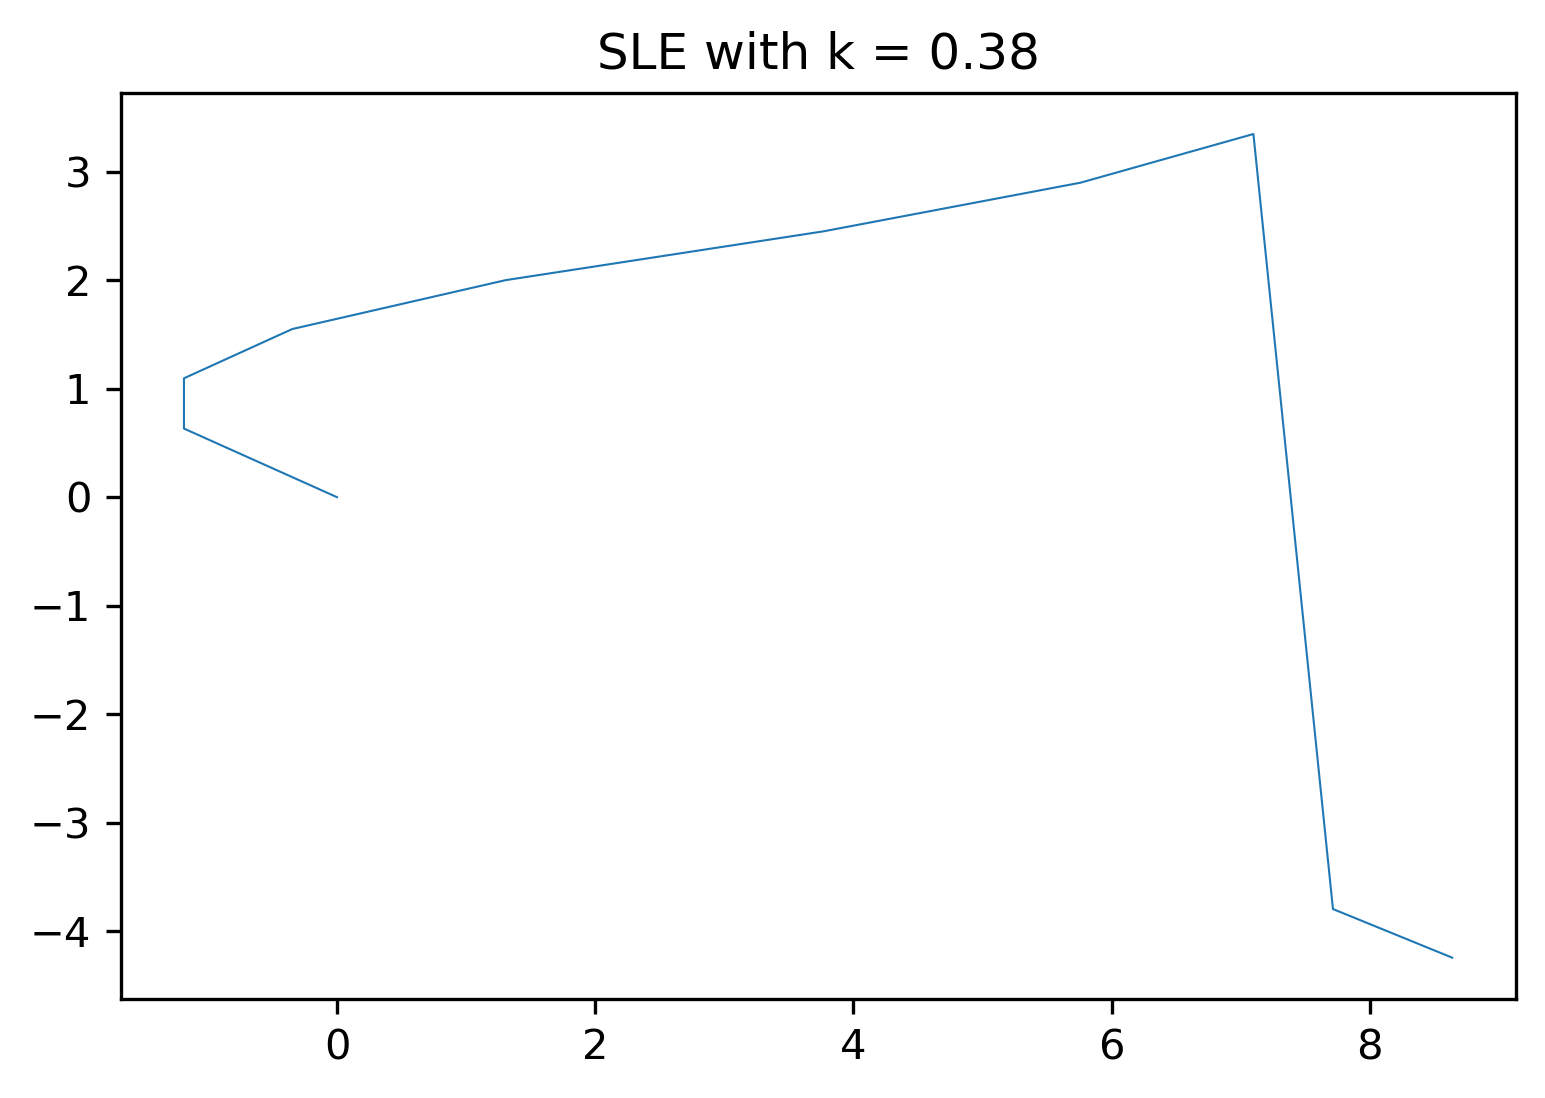

In [43]:
no_of_points = len(path_curve)
print(no_of_points)

xvalues = []
yvalues = []

for i in range(no_of_points):
    xvalues.append(path_curve[i].real*100)
    yvalues.append(path_curve[i].imag)

plt.figure(0, dpi=300)
plt.plot(xvalues, yvalues, linewidth=0.5)
plt.title('SLE with k = ' + str(round(k, 2)))
#plt.axis('scaled')
plt.show()
#print(yvalues)


In [41]:
no_of_points = len(path_curve)
print(no_of_points)


397


In [37]:
from scipy.stats import norm

# Process parameters
delta = 0.25
dt = 0.1

# Initial condition.
x = 0.0

# Number of iterations to compute.
n = 10

b_w=[0]
# Iterate to compute the steps of the Brownian motion.
for j in range(n):
    x = x + aum_br(k,D_t)
    b_w.append(x)


In [38]:
print(b_w[90:100])

[]


----------------------------------------

In [37]:
#Angulo
#Create a function than given 3 ponits(cartesians) the output is the angle
import matplotlib.pyplot as plt
def angle_a(x1,x2,x3,y1,y2,y3):
    m1=(y2-y1)/(x2-x1)*1.0
    m2=(y3-y2)/(x3-x2)*1.0
    if abs(m1)>1:
        theta_1=abs(math.atan(1/m1))
        theta_2=abs(math.atan(1/m2))
    else:
        theta_1=abs(math.atan(m1))
        theta_2=abs(math.atan(m2))
    if m1*m2<=0:
        alpha = -(theta_2+ theta_1)
    elif m1*m2>=0 and (m1<=0 or m2<=0):
        alpha=-(theta_2-theta_1)
    else:
        alpha=theta_2-theta_1
    X=[x1,x2,x3]
    Y=[y1,y2,y3]
    plt.plot(X,Y)
    return alpha
#*180/math.pi


-1.8370483759458218

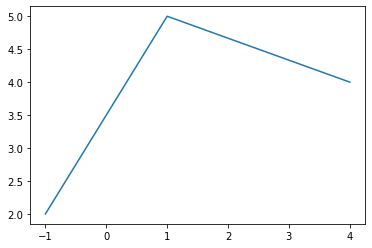

In [42]:
angle_a(-1.0,1.0,4.0,2.0,5.0,4.0)

In [106]:
math.atan((4-5)/3.0)*180/math.pi

-18.43494882292201

In [98]:
def width_angle(x,y,t_0) :
    thetas=[t_0]
    l=len(x)
    theta=t_0
    for i in range(1,l-1):
        theta=theta+angle_al(x[i-1],x[i],x[i+1],y[i-1],y[i],y[i+1])
        #print(theta)
        while abs(theta)>2*math.pi:
            if theta>0:
                theta=theta-2*math.pi
            else:
                theta = theta + 2*math.pi

        thetas.append(theta)
    return thetas    
    
    

In [99]:
X=(0.0,-1.0,1.0,4.0,5.0)
Y=(0.0,2.0,5.0,4.0,1.0)

In [100]:
width_angle(X,Y,0)

[0, -1.0516502125483735, -2.356194490192345, -3.283489708193957]

In [101]:
def v_esp_2(A):
    sum = 0
    l=len(A)
    for j in range(l):
        c=A[j]**2.0
        while abs(c)>2*math.pi:
            c=c-2*math.pi            
        sum = sum + c
    return sum/l

In [102]:
s=v_esp_2(width_angle(xvalues,yvalues,0))

In [103]:
print(s)

2.4776364554845003


In [89]:
s=width_angle(xvalues,yvalues,0)

In [17]:
print(s[20:30])

[-0.4157066176323049, -1.0577467393991595, -1.351026340860108, -0.17701246600129972, 0.7517454400925698, 0.7307542230835706, 0.7107814207011577, 0.4814545833205117, 0.23769351474574174, 0.8599250025386974]


In [104]:
def v_esp(A):
    sum = 0
    l=len(A)
    for j in range(l):           
        sum = sum + A[j]
    return sum/l

In [107]:
s=v_esp(width_angle(xvalues,yvalues,0))

In [108]:
print(s)

-2.7368629368045765


In [54]:
L_y = np.amax(yvalues)

In [119]:
print(L_y)

1.7075964982498202


In [4]:
# Find the alpha_i between 3 vectors
def angle_alpha_i(x1,x2,x3,y1,y2,y3):
    v1 = np.array([x2-x1,y2-y1])
    v2 = np.array([x3-x2,y3-y2])
    n1 = np.sqrt(np.dot(v1, v1))
    n2 = np.sqrt(np.dot(v2, v2))
    cose = np.dot(v1,v2)/(n1*n2)
    theta = math.acos(cose)
    
    if (y2 > y1) and (x2 > x3):
        theta = -theta 
    
    if (y1 > y2) and (x3 > x2):
        theta = -theta
    
    if (y1 == y2):
        if (y2 > y3) and (x1 > x2):
            theta = -theta
        if (y3 > y2) and (x2 > x1):
            theta = -theta
    
    
    X = [x1,x2,x3]
    Y = [y1,y2,y3]
    plt.plot(X,Y)
    return theta

"""
# Find the winding angle of all the data:
# theta_i = theta_i-1 + alpha_i
def winding_angle_vector(x, y):
"""    



# Find the average of the squares of a vector
# <theta**2> 
def average_squares(vector):
    n = len(vector)
    suma = 0
    for ii in range (len(vector)):
        suma += (vector[ii]**2)
    return suma/n




116.56505117707799


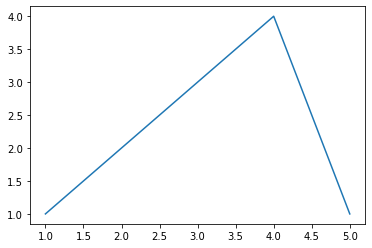

In [49]:
rad = angle_al(1.0, 4.0, 5.0, 1.0, 4.0, 1.0)
deg = rad*180/np.pi
print (deg)

-161.56505117707798

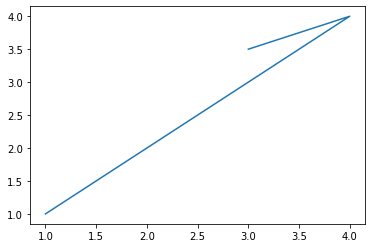

In [50]:
angle_al(1.0,4.0,3.0,1.0,4.0,3.5)*180/np.pi

104.0362434679265

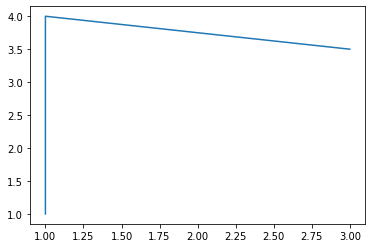

In [51]:
angle_al(1.0,1.0,3.0,1.0,4.0,3.5)*180/np.pi

75.96375653207352

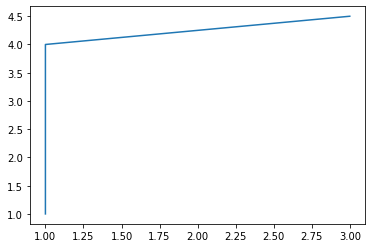

In [52]:
angle_al(1.0,1.0,3.0,1.0,4.0,4.5)*180/np.pi